<a href="https://colab.research.google.com/github/Arta-DS/Features-and-model-building/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [25]:
housing= pd.read_csv("https://media.geeksforgeeks.org/wp-content/uploads/20240319120216/housing.csv")
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [26]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [27]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [28]:
housing = housing[ pd.isnull( housing['total_bedrooms'] ) == 0 ]
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [29]:
X = housing.drop(['median_house_value'], axis=1)
y = housing['median_house_value']

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X_train.columns[X_train.dtypes == 'object']:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


In [31]:
X_train.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,1
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,1
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,4
6823,-118.10,34.09,42.0,1460.0,289.0,829.0,273.0,4.8750,0
8384,-118.36,33.95,26.0,3231.0,1089.0,3193.0,1020.0,2.6535,0
2758,-115.49,32.67,29.0,1523.0,440.0,1302.0,393.0,1.1311,1
18143,-122.06,37.34,20.0,3435.0,593.0,1293.0,553.0,6.7578,0
15621,-122.41,37.80,52.0,2583.0,672.0,1335.0,613.0,3.1477,3


In [32]:
# Проверка количества строк в каждой выборке
print("Количество строк в тренировочной выборке: {}".format(len(X_train)))
print("Количество строк в тестовой выборке: {}".format(len(X_test)))

Количество строк в тренировочной выборке: 16346
Количество строк в тестовой выборке: 4087


<Axes: >

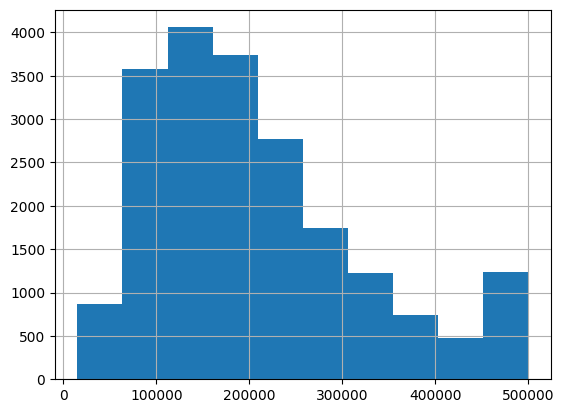

In [33]:
housing['median_house_value'].hist()

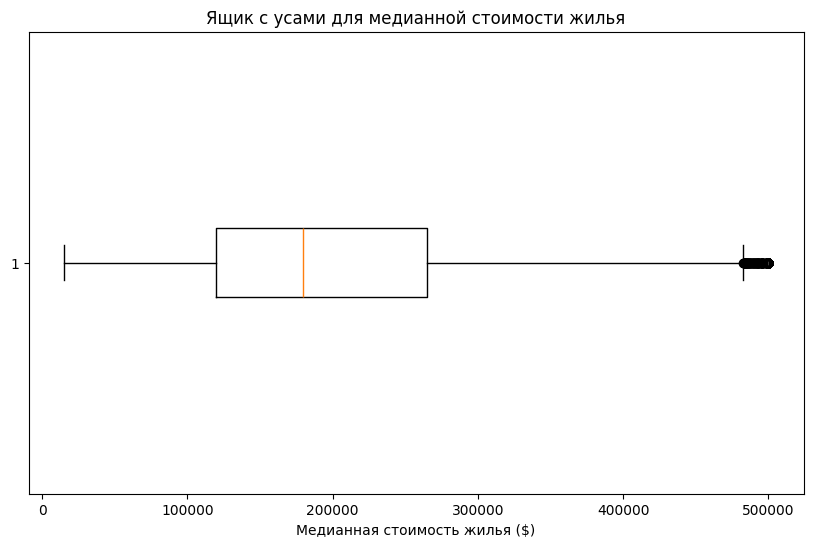

In [34]:
# Ящик с усами
plt.figure(figsize=(10, 6))
plt.boxplot(housing['median_house_value'], vert=False)
plt.title('Ящик с усами для медианной стоимости жилья')
plt.xlabel('Медианная стоимость жилья ($)')
plt.show()

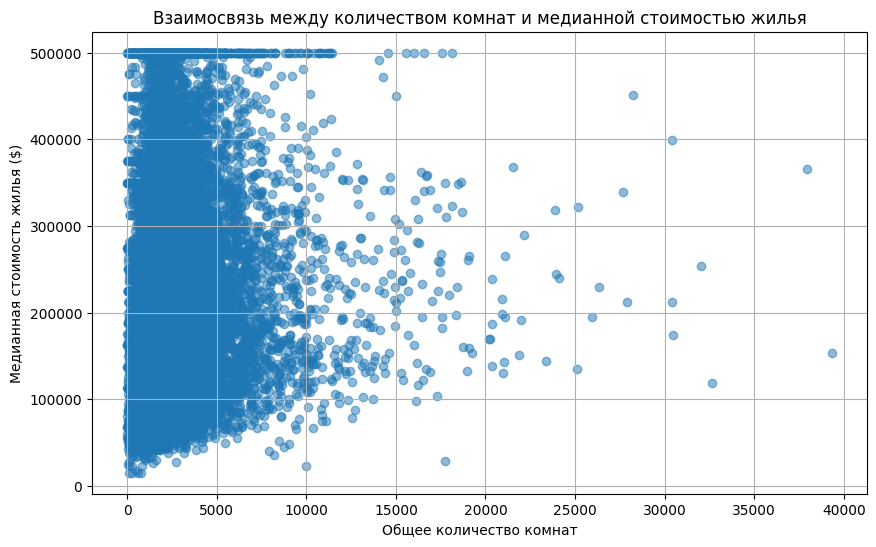

In [35]:
# Точечная диаграмма
plt.figure(figsize=(10, 6))
plt.scatter(housing['total_rooms'], housing['median_house_value'], alpha=0.5)
plt.title('Взаимосвязь между количеством комнат и медианной стоимостью жилья')
plt.xlabel('Общее количество комнат')
plt.ylabel('Медианная стоимость жилья ($)')
plt.grid(True)
plt.show()

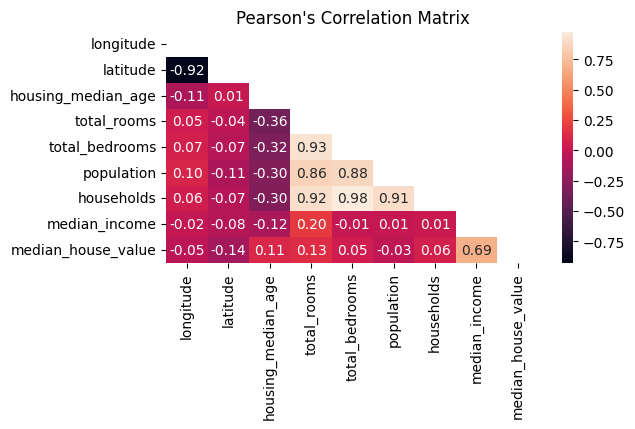

In [36]:
corr = housing.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(6, 3))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", linecolor="c")
plt.title("Pearson's Correlation Matrix")
plt.show()

In [37]:
# Функция для отбора признаков по значению корреляции
def select_features_by_correlation(df, target, threshold=0.8):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    selected_columns = [col for col in df.columns if col not in to_drop]
    return selected_columns

In [38]:
# Применение функции для отбора признаков
selected_columns = select_features_by_correlation(X_train, y_train)
X_train_corr = X_train[selected_columns]
X_test_corr = X_test[selected_columns]

In [39]:
# Функция для удаления выбросов
def remove_outliers(df, target):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    index = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
    return df[~index], target[~index]

In [40]:
# Применение функции для удаления выбросов
X_train_no_outliers, y_train_no_outliers = remove_outliers(X_train_corr, y_train)
X_test_no_outliers, y_test_no_outliers = remove_outliers(X_test_corr, y_test)

In [41]:
# Функция для расчета метрик
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)

    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)

    return {
        'RMSE Train': rmse_train,
        'R2 Train': r2_train,
        'RMSE Test': rmse_test,
        'R2 Test': r2_test
    }

In [42]:
# Модель 1: На основе всех признаков
model_all_features = LinearRegression()
model_all_features.fit(X_train, y_train)

LinearRegression()

In [43]:
# Модель 2: На основе признаков, отобранных по корреляциям
model_selected_features = LinearRegression()
model_selected_features.fit(X_train_corr, y_train)

LinearRegression()

In [44]:
# Модель 3: На основе признаков, отобранных по корреляциям и с удалением выбросов
model_no_outliers = LinearRegression()
model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

LinearRegression()

In [45]:
# Оценка первой модели
metrics_all_features = evaluate_model(model_all_features, X_train, y_train, X_test, y_test)
metrics_all_features

{'RMSE Train': 69409.69625821078,
 'R2 Train': 0.636039119275638,
 'RMSE Test': 70171.99539639728,
 'R2 Test': 0.6399236679243365}

In [46]:
# Оценка второй модели
metrics_selected_features = evaluate_model(model_selected_features, X_train_corr, y_train, X_test_corr, y_test)
metrics_selected_features

{'RMSE Train': 79867.6309398691,
 'R2 Train': 0.5181010008213431,
 'RMSE Test': 80936.42219068688,
 'R2 Test': 0.5209785859860745}

In [47]:
# Оценка третьей модели
metrics_no_outliers = evaluate_model(model_no_outliers, X_train_no_outliers, y_train_no_outliers, X_test_no_outliers, y_test_no_outliers)
metrics_no_outliers

{'RMSE Train': 67427.34733260093,
 'R2 Train': 0.5457463621471104,
 'RMSE Test': 68011.88104252245,
 'R2 Test': 0.5485022445908896}

На основе предоставленных оценок моделей можно провести сравнение их производительности по двум основным показателям: коэффициенту детерминации (\(R^2\)) и корню среднеквадратической ошибки (RMSE).

### Коэффициент детерминации \(R^2\)
Этот показатель говорит о том, насколько хорошо модель объясняет вариацию зависимой переменной. Чем ближе значение \(R^2\) к 1, тем лучше модель соответствует данным.

#### На тренировочном наборе:
1. Первая модель: \(R^2 = 0.636\)
2. Вторая модель: \(R^2 = 0.518\)
3. Третья модель: \(R^2 = 0.546\)

#### На тестовом наборе:
1. Первая модель: \(R^2 = 0.640\)
2. Вторая модель: \(R^2 = 0.521\)
3. Третья модель: \(R^2 = 0.549\)

### Корень среднеквадратичной ошибки (RMSE)
Этот показатель измеряет среднюю величину ошибки предсказаний модели. Меньшее значение RMSE предпочтительнее, так как оно указывает на меньшую ошибку.

#### На тренировочном наборе:
1. Первая модель: RMSE = 69,409.70
2. Вторая модель: RMSE = 79,867.63
3. Третья модель: RMSE = 67,427.35

#### На тестовом наборе:
1. Первая модель: RMSE = 70,171.99
2. Вторая модель: RMSE = 80,936.42
3. Третья модель: RMSE = 68,011.88

### Итоговое сравнение:

1. Первая модель имеет лучшие показатели по \(R^2\), как на тренировочном, так и на тестовом наборах. Однако её RMSE немного выше, чем у третьей модели.
   
2. Вторая модель демонстрирует худшие результаты по обоим показателям: самый низкий \(R^2\) и наибольший RMSE.

3. Третья модель обладает наилучшим показателем RMSE среди всех трёх моделей, однако уступает первой модели по \(R^2\).

Таким образом, первая модель выглядит наиболее сбалансированной и эффективной, учитывая оба показателя: она обеспечивает хорошее объяснение вариации данных и сравнительно небольшую ошибку предсказаний.